In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\data\car_age_price.csv')

In [3]:
print("  \nDataset loaded successfully.  ")
df.head()

  
Dataset loaded successfully.  


,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
df.shape

(112, 2)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
print('Shape After deleting duplicate values:',df.shape)


Shape After deleting duplicate values: (58, 2)


In [7]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
5,2015,350000
6,2016,425000


In [8]:
print("\n--- Dataset Information ---")
print("\n                           ")
df.info()

print("\n--- Dataset Description ---")
df.describe()


--- Dataset Information ---

                           
<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 0 to 110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    58 non-null     int64
 1   Price   58 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB

--- Dataset Description ---


,Year,Price
count,58.000000,58.000000
mean,2016.568966,474448.224138
std,1.902096,105995.736551
min,2013.000000,300000.000000
25%,2015.000000,397000.000000
50%,2017.000000,475000.000000
75%,2018.000000,543750.000000
max,2020.000000,755000.000000


In [9]:
df.isna().sum()

Year     0
Price    0
dtype: int64

In [10]:
df.columns

Index(['Year', 'Price'], dtype='object')

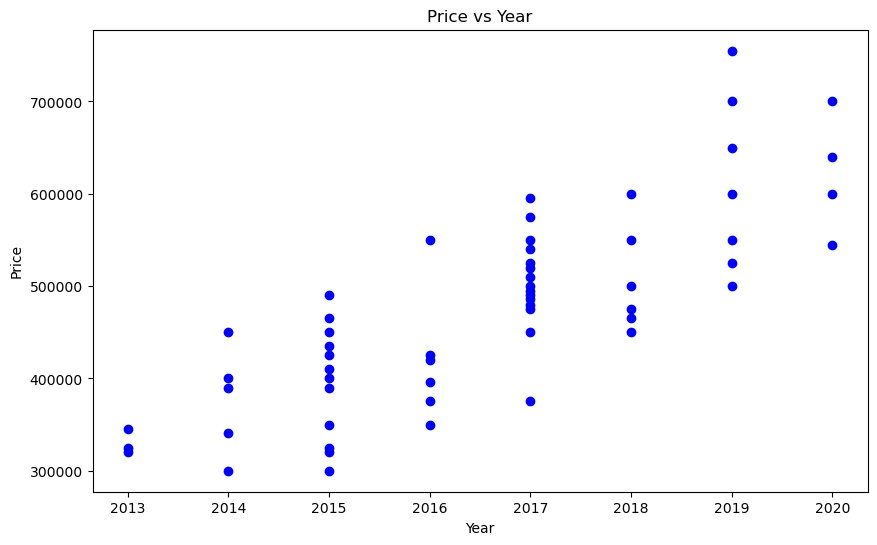

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Price'], color='blue')
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

#Linear Regression Model

In [12]:
x = df[['Year']]
y = df['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [13]:
lr = LinearRegression()

In [14]:
model = lr.fit(x_train,y_train)

In [15]:
predictions = model.predict(x_test)

In [16]:
print("\n--- Linear Regression Model ---")
predictions


--- Linear Regression Model ---


array([541975.77419354, 498094.31397849, 498094.31397849, 410331.39354838,
       366449.93333334, 498094.31397849, 410331.39354838, 322568.47311828,
       410331.39354838, 498094.31397849, 629738.69462365, 410331.39354838])

In [17]:
print('Mean Squared Error = ', mean_squared_error(y_test,predictions))
print('R Squared Value = ',r2_score(y_test,predictions))

Mean Squared Error =  4578558064.883415
R Squared Value =  0.5952655854274035


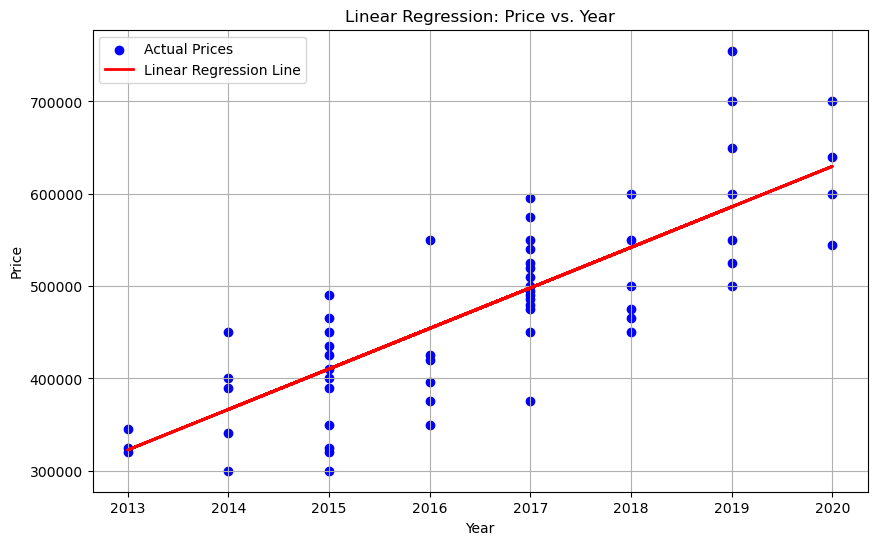

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual Prices')
plt.plot(x, lr.predict(x), color='red', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression: Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
year_2022 = np.array([[2022]])
predicted_price_2022_lr = lr.predict(year_2022)[0]
print("Predicted price of a 2022 model (Linear Regression):", predicted_price_2022_lr)


Predicted price of a 2022 model (Linear Regression): 717501.615053758


#Lasso Regression Model

In [20]:
lasso = Lasso(alpha=0.1, random_state=42)  
lasso_model=lasso.fit(x_train, y_train)

In [21]:
y_pred = lasso_model.predict(x_test)

In [22]:
print('Mean Squared Error = ', mean_squared_error(y_test,y_pred))
print('R Squared Value = ',r2_score(y_test,y_pred))


Mean Squared Error =  4578559309.462235
R Squared Value =  0.5952654754093862


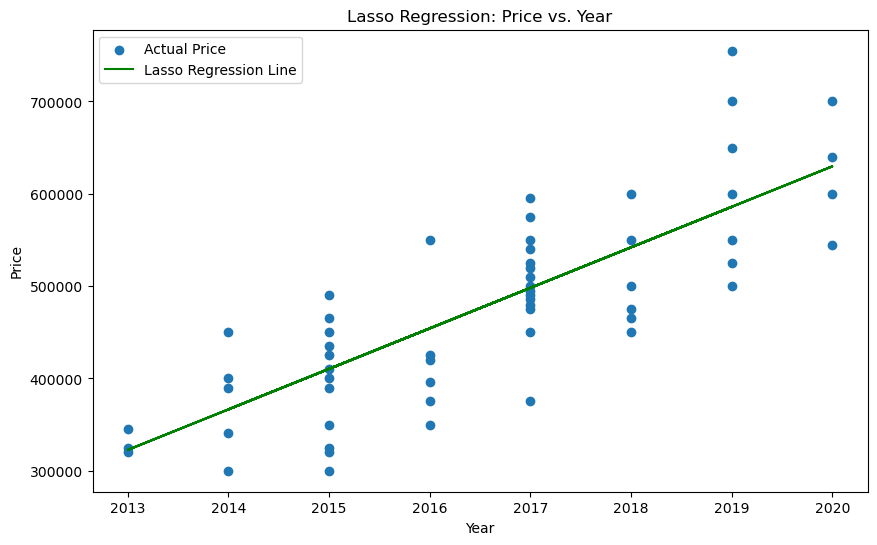

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(x='Year', y='Price', data=df, label='Actual Price')
plt.plot(x, lasso_model.predict(x), color='green', label='Lasso Regression Line')
plt.title('Lasso Regression: Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


In [24]:
predicted_price_2022_lasso = lasso_model.predict(year_2022)
print("\nPredicted price for a 2022 model (Lasso Regression):", predicted_price_2022_lasso[0])


Predicted price for a 2022 model (Lasso Regression): 717501.4641935527


In [25]:
mse_linear = mean_squared_error(y_test, predictions)
r2_linear = r2_score(y_test,predictions)
mse_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)

In [26]:
print("\n--- Model Comparison ---")
comparison_data = {
    'Model':['Linear Regression','Lasso Regression'],
    'MSE': [mse_linear, mse_lasso],
    'R2 Score': [r2_linear, r2_lasso]
}
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)



--- Model Comparison ---
               Model           MSE  R2 Score
0  Linear Regression  4.578558e+09  0.595266
1   Lasso Regression  4.578559e+09  0.595265


In [27]:
print("\nThe performance metrics for both models are identical.\n We can use either model for the prediction.")


The performance metrics for both models are identical.
 We can use either model for the prediction.
